<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.multiclass import OneVsRestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load Breast cancer dataset & view description
data_breast_cancer = load_breast_cancer()
X,y = data_breast_cancer.data, data_breast_cancer.target
print(data_breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
# View Data Column Names
print(data_breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Load data as dataframe
df_breast_cancer = pd.DataFrame(data=X, columns=data_breast_cancer.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
# Train a basic Logistic Regression Model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Print the Accuracy Scores
print(f'Training Accuracy: {clf.score(X_train, y_train)}')
print(f'Testing Accuracy: {clf.score(X_test, y_test)}')

Training Accuracy: 0.9538461538461539
Testing Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the actual results of target Y along with the prediction and prediction probability
print(f'Actual: {y[0]}')
print(f'Prediction: {clf.predict(df_breast_cancer.iloc[0].values.reshape(1,-1))[0]}')
print(f'Prediction Probability: {clf.predict_proba(df_breast_cancer.iloc[0].values.reshape(1,-1))[0]}')

Actual: 0
Prediction: 0
Prediction Probability: [1.00000000e+00 1.61481619e-16]


In [ ]:
# Prepare dataframe for Data Distribution Analysis of prediction results
df_predicted_results = pd.DataFrame(data=X_test, columns=data_breast_cancer.feature_names)
df_predicted_results['actual_results'] = y_test
df_predicted_results['predicted_results'] = clf.predict(X_test)

# Create column of predicted probabilities
x = []
x.append(clf.predict_proba(X_test))
x = x[0]
df_predicted_results['predicted_probability_0'] = [i[0] for i in x]
df_predicted_results['predicted_probability_1'] = [i[1] for i in x]

df_predicted_results.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,actual_results,predicted_results,predicted_probability_0,predicted_probability_1
0,12.670,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.021070,0.1707,0.05984,...,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888,1,1,0.002586,0.997414
1,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.000000,0.1742,0.06059,...,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,1,1,0.011365,0.988635
2,12.830,15.73,82.89,506.9,0.09040,0.08269,0.058350,0.030780,0.1705,0.05913,...,0.13260,0.26100,0.34760,0.09783,0.3006,0.07802,1,1,0.005325,0.994675
3,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,...,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,1,1,0.003862,0.996138
4,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,...,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1,1,0.001553,0.998447


<Axes: xlabel='predicted_probability_1', ylabel='Count'>

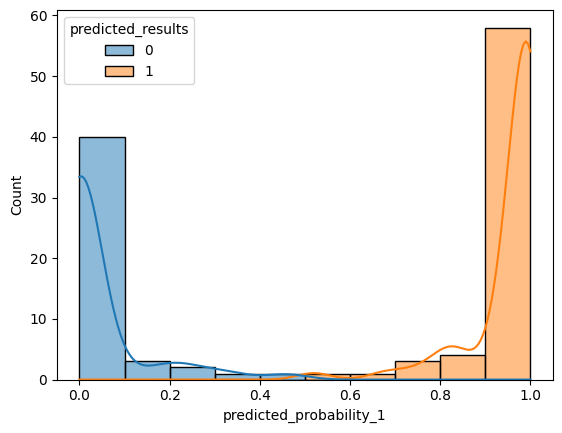

In [ ]:
# Histogram plot of predicted results
sns.histplot(data=df_predicted_results, x='predicted_probability_1', hue='predicted_results', kde=True, binwidth = 0.1)

<Axes: xlabel='predicted_probability_1', ylabel='Count'>

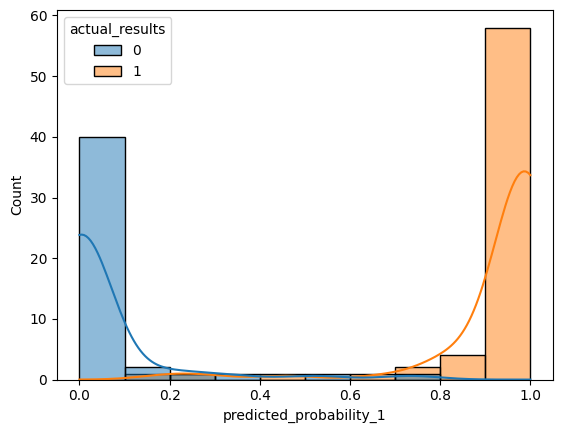

In [ ]:
# Histogram plot of actual results
sns.histplot(data=df_predicted_results, x='predicted_probability_1', hue='actual_results', kde=True, binwidth = 0.1)

In [ ]:
# Description of model predicted probability of actual results
df_predicted_results[df_predicted_results['actual_results'] == 1]['predicted_probability_1'].describe()

,predicted_probability_1
count,68.000000
mean,0.937103
std,0.151491
min,0.189267
25%,0.962700
50%,0.993645
75%,0.997272
max,0.999800


In [ ]:
# Prediction based on different threshold
threshold = 0.40
y_pred_custom = [1 if i > threshold else 0 for i in df_predicted_results['predicted_probability_1']]

# Assess Results after change in threshold
print(f'Accuracy of Actual vs Predicted at 0.5 threshold: {accuracy_score(y_test, df_predicted_results['predicted_results'])}')
print(f'Accuracy of Actual vs Predicted at {threshold} threshold: {accuracy_score(y_test, y_pred_custom)}')
print(f'Precision of Actual vs Predicted at 0.5 threshold: {precision_score(y_test, df_predicted_results['predicted_results'])}')
print(f'Precision of Actual vs Predicted at {threshold} threshold: {precision_score(y_test, y_pred_custom)}')

Accuracy of Actual vs Predicted at 0.5 threshold: 0.956140350877193
Accuracy of Actual vs Predicted at 0.4 threshold: 0.9649122807017544
Precision of Actual vs Predicted at 0.5 threshold: 0.9701492537313433
Precision of Actual vs Predicted at 0.4 threshold: 0.9705882352941176


In [ ]:
# Predict Log Proba
print(f"Predict Probability : {clf.predict_proba(df_breast_cancer.iloc[0].values.reshape(1,-1))[0]}")
print(f"Predict Log Probability : {clf.predict_log_proba(df_breast_cancer.iloc[0].values.reshape(1,-1))[0]}")
print(f"Deriving Probability from Log Probability : {np.exp(clf.predict_log_proba(df_breast_cancer.iloc[0].values.reshape(1,-1)))[0]}")

Predict Probability : [1.00000000e+00 1.61481619e-16]
Predict Log Probability : [-1.11022302e-16 -3.63621403e+01]
Deriving Probability from Log Probability : [1.00000000e+00 1.61481619e-16]


# Logistic Regression Model Attributes

In [ ]:
# Attribute - Features
print(f"Attribute N Features in : {clf.n_features_in_}")

Attribute N Features in : 30


In [ ]:
# Attribute - Classes
clf.classes_

array([0, 1])

In [ ]:
# Attribute - Intercept
clf.intercept_

array([0.35510274])

In [ ]:
# Attribute - Coefficients
clf.coef_

array([[ 1.70444489,  0.01988446, -0.03652987,  0.00194122, -0.06431653,
        -0.31889864, -0.44762031, -0.18940602, -0.0744033 , -0.01786711,
         0.0769472 ,  0.95792681,  0.52941729, -0.13390208, -0.00705404,
        -0.07234977, -0.09481868, -0.02492975, -0.01705999, -0.00729526,
         1.74354709, -0.24563467, -0.19375336, -0.02579782, -0.12905941,
        -1.05071964, -1.27504185, -0.37685258, -0.25191675, -0.10396586]])

In [ ]:
# Inspect top features of the model
df_feature_coeff = pd.DataFrame(clf.coef_[0], index=data_breast_cancer.feature_names, columns=['Coefficient'])
df_feature_coeff.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

,Coefficient
worst radius,1.743547
mean radius,1.704445
worst concavity,-1.275042
worst compactness,-1.050720
texture error,0.957927
perimeter error,0.529417
mean concavity,-0.447620
worst concave points,-0.376853
mean compactness,-0.318899
worst symmetry,-0.251917


In [ ]:
# Calculate prediction probability from Logistic Regression Model Formula
print(f'Actual: {y[0]}')
print(f'Prediction Probability: {clf.predict_proba(df_breast_cancer.iloc[0].values.reshape(1,-1))[0]}')
print(f'Prediction Probability from formula : {1/(1+np.exp(-((clf.intercept_)[0] + np.matmul(clf.coef_, df_breast_cancer.iloc[0].values))))}')

Actual: 0
Prediction Probability: [1.00000000e+00 3.01829533e-14]
Prediction Probability from formula : [3.01829533e-14]


In [ ]:
# Coefficients of features to assess
df_feature_coeff.loc[['worst radius', 'worst concavity']]

,Coefficient
worst radius,1.743547
worst concavity,-1.275042


In [ ]:
# Impact of increasing 1 unit of feature with positive coefficient on the probability
feature = 'worst radius'
test_unit = X[0].copy()
print(f'Feature {feature} index : {df_breast_cancer.columns.get_loc(feature)}')
print(f'Value of feature {feature} : {test_unit[20]}')
predict_1 = clf.predict_proba(test_unit.reshape(1,-1))[0]
print(f'Prediction Probability: {predict_1}')

# Increment by 1 on feature with positive coefficient
test_unit[20] = test_unit[20] + 1
print(f'Value of feature {feature} after increment by 1: {test_unit[20]}')
predict_2 = clf.predict_proba(test_unit.reshape(1,-1))[0]
print(f'Prediction Probability: {predict_2}')
print(f'Magnitude change in Probability: {predict_2[1] / predict_1[1]}')

Feature worst radius index : 20
Value of feature worst radius : 25.38
Prediction Probability: [1.00000000e+00 1.61481619e-16]
Value of feature worst radius after increment by 1: 26.38
Prediction Probability: [1.00000000e+00 9.23285413e-16]
Change in Probability: 5.7175882738714945


In [ ]:
# Impact of increasing 1 unit of feature with negative coefficient on the probability
feature = 'worst concavity'
test_unit = X[0].copy()
print(f'Feature {feature} index : {df_breast_cancer.columns.get_loc(feature)}')
print(f'Value of feature {feature} : {test_unit[26]}')
predict_1 = clf.predict_proba(test_unit.reshape(1,-1))[0]
print(f'Prediction Probability: {predict_1}')

# Increment by 1 on feature with positive coefficient
test_unit[20] = test_unit[26] + 1
print(f'Value of feature {feature} after increment by 1: {test_unit[20]}')
predict_2 = clf.predict_proba(test_unit.reshape(1,-1))[0]
print(f'Prediction Probability: {predict_2}')
print(f'Magnitude change in Probability: {predict_2[1] / predict_1[1]}')

Feature worst concavity index : 26
Value of feature worst concavity : 0.7119
Prediction Probability: [1.00000000e+00 1.61481619e-16]
Value of feature worst concavity after increment by 1: 1.7119
Prediction Probability: [1.0000000e+00 1.9334501e-34]
Magnitude change in Probability: 1.1973189954145803e-18


# Hyperparameters

In [ ]:
# Hyperparameter tuning based on solvers
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for i in solvers:
  clf_solver = LogisticRegression(random_state=0, solver=i).fit(X_train, y_train)
  print(f'Solver: {i}, Accuracy on train data: {round(clf_solver.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_solver.score(X_test, y_test),4)}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561
Solver: liblinear, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561
Solver: newton-cg, Accuracy on train data: 0.9582, Accuracy on test data: 0.9649
Solver: newton-cholesky, Accuracy on train data: 0.956, Accuracy on test data: 0.9649
Solver: sag, Accuracy on train data: 0.9143, Accuracy on test data: 0.9211
Solver: saga, Accuracy on train data: 0.9033, Accuracy on test data: 0.9123


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Hyperparameter tuning based on penalty
print('Solver : liblinear')
clf_hyper_penalty = LogisticRegression(random_state=0, solver= 'liblinear', penalty='l1').fit(X_train, y_train)
print(f'Penalty: l1, Accuracy on train data: {round(clf_hyper_penalty.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_penalty.score(X_test, y_test),4)}')
clf_hyper_penalty = LogisticRegression(random_state=0, solver= 'liblinear', penalty='l2').fit(X_train, y_train)
print(f'Penalty: l2, Accuracy on train data: {round(clf_hyper_penalty.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_penalty.score(X_test, y_test),4)}')

print('Solver : saga')
for i in ['l1','l2','elasticnet']:
  if i == 'elasticnet':
    clf_hyper_penalty = LogisticRegression(random_state=0, solver= 'saga', penalty=i, l1_ratio=0.5).fit(X_train, y_train)
    print(f'Penalty: {i}, Accuracy on train data: {round(clf_hyper_penalty.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_penalty.score(X_test, y_test),4)}')
  else:
    clf_hyper_penalty = LogisticRegression(random_state=0, solver= 'saga', penalty=i).fit(X_train, y_train)
    print(f'Penalty: {i}, Accuracy on train data: {round(clf_hyper_penalty.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_penalty.score(X_test, y_test),4)}')

Solver : liblinear


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, Accuracy on train data: 0.9582, Accuracy on test data: 0.9737
Penalty: l2, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561
Solver : saga
Penalty: l1, Accuracy on train data: 0.9033, Accuracy on test data: 0.9123
Penalty: l2, Accuracy on train data: 0.9033, Accuracy on test data: 0.9123
Penalty: elasticnet, Accuracy on train data: 0.9033, Accuracy on test data: 0.9123


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Hyperparameter tuning based on tol parameter
for i in [float(1e-6), float(1e-4), float(1e-2)]:
  clf_hyper_tol = LogisticRegression(random_state=0, tol=i).fit(X_train, y_train)
  print(f'Tol: {i}, Accuracy on train data: {round(clf_hyper_tol.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_tol.score(X_test, y_test),4)}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tol: 1e-06, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tol: 0.0001, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561
Tol: 0.01, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Hyperparameter tuning based on C parameter
for i in [0.25, 0.5, 0.75, 1.0, 1.5]:
  clf_hyper_C = LogisticRegression(random_state=0, C=i).fit(X_train, y_train)
  print(f'C: {i}, Accuracy on train data: {round(clf_hyper_C.score(X_train, y_train),4)}, Accuracy on test data: {round(clf_hyper_C.score(X_test, y_test),4)}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C: 0.25, Accuracy on train data: 0.9407, Accuracy on test data: 0.9649
C: 0.5, Accuracy on train data: 0.9516, Accuracy on test data: 0.9561
C: 0.75, Accuracy on train data: 0.9429, Accuracy on test data: 0.9649
C: 1.0, Accuracy on train data: 0.9538, Accuracy on test data: 0.9561
C: 1.5, Accuracy on train data: 0.9516, Accuracy on test data: 0.9561


# Multi Class Classification

In [ ]:
# Load wine dataset
data_wine = load_wine()
X_wine, y_wine = data_wine.data, data_wine.target

df_wine = pd.DataFrame(data=X_wine, columns=data_wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Examine actual results
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# Train regular Logistic Regression Model with different solvers
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_wine, y_wine)

print(f'Accuracy: {clf.score(X_wine, y_wine)}')
print(f'Precision : {precision_score(y_wine, clf.predict(X_wine), average='weighted')}')
clf.predict(X_wine)

Accuracy: 0.9943820224719101
Precision : 0.994460049937578


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# One Vs Rest Classifier
clf_ovr = OneVsRestClassifier(LogisticRegression(random_state=0, solver='liblinear')).fit(X_wine, y_wine)
print(f'Accuracy: {clf_ovr.score(X_wine, y_wine)}')
clf_ovr.predict(X_wine)

Accuracy: 0.9719101123595506


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])